<a href="https://colab.research.google.com/github/IshfaqMalik/Dog_Breed_Classifier/blob/main/Dogbreed_Project_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import numpy as np 
import pandas as pd 


In [2]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [3]:
from torchvision import datasets, transforms as T

In [4]:
from torch import nn 

from torch.nn import functional as F

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [5]:
from torch.utils.data.sampler import SubsetRandomSampler

In [6]:
transform = T.Compose([T.RandomRotation(30),T.Resize(256), T.CenterCrop(224), T.ToTensor(),
                       T.Normalize( mean=[0.485, 0.456, 0.406], 
                                   std=[0.229, 0.224, 0.225])])

trainset = datasets.ImageFolder('/content/drive/MyDrive/dogImages/dogImages/train', transform = transform)

In [7]:
test_transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(),
                       T.Normalize( mean=[0.485, 0.456, 0.406], 
                                   std=[0.229, 0.224, 0.225])])

In [8]:

# how many samples per batch to load
batch_size = 64


In [9]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [10]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

In [11]:
import os
all_class_dir = os.listdir('/content/drive/MyDrive/dogImages/dogImages/train')
all_class_dir.sort()
class_names = [name[4:].replace("_", " ") for name in all_class_dir]

# New Section

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

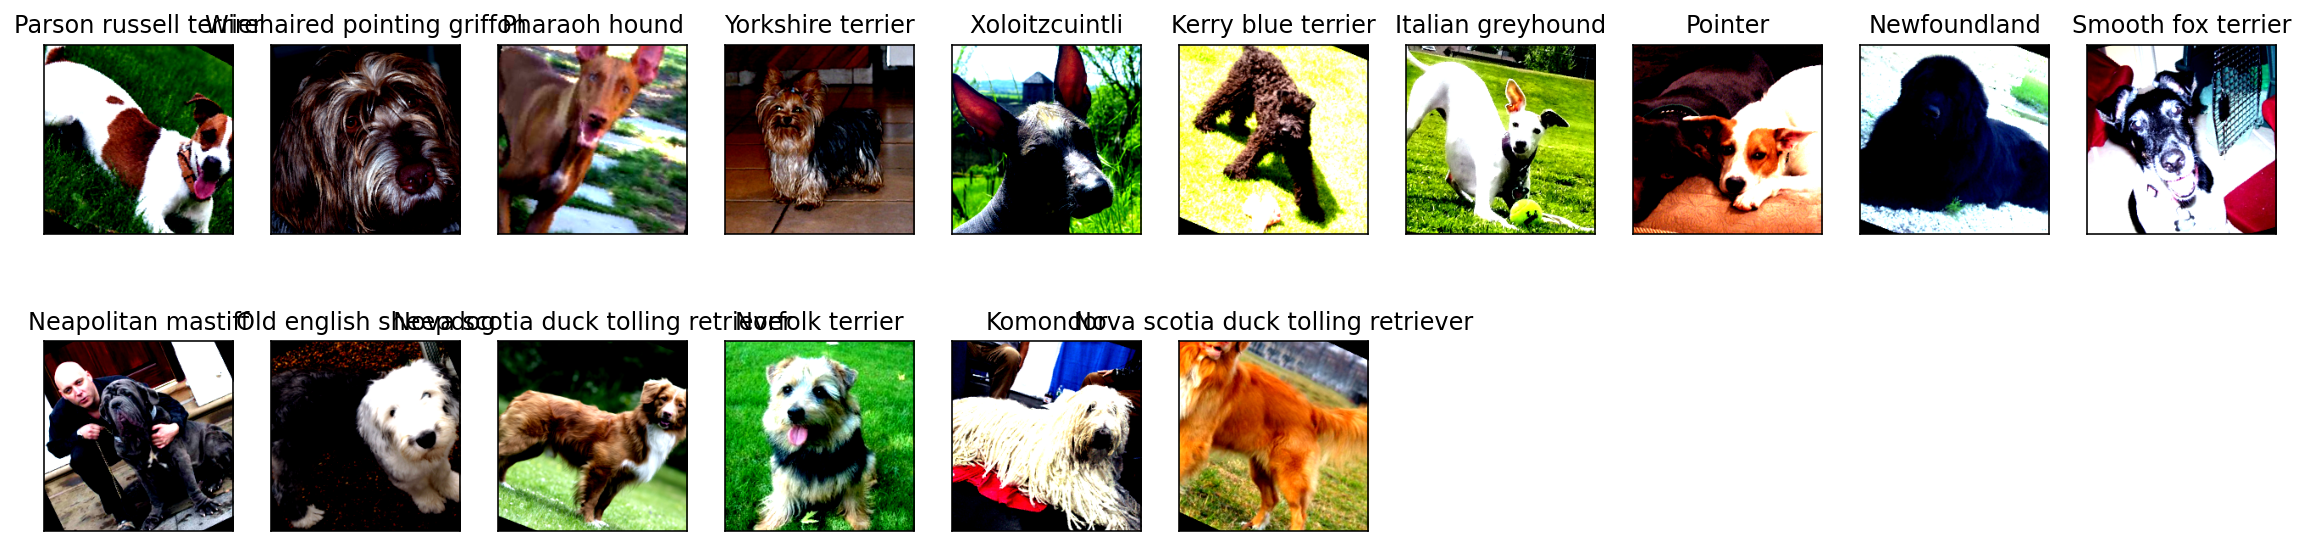

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20,5))
# display 20 images
for idx in np.arange(16):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(class_names[labels[idx]])

In [13]:
len(trainset)

2101

In [14]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [15]:
class Net (nn.Module):
  def __init__ (self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3, 256, 3, padding =1)
    self.conv2 = nn.Conv2d(256,256, 3, padding = 1 )
    self.conv3 = nn.Conv2d(256, 128, 3, padding =1)
    self.conv4 = nn.Conv2d(128,64,3, padding =1)
    self.conv5 = nn.Conv2d(64,32,3, padding = 1)
    
    self.pool =nn.MaxPool2d(2,2 )
    self.fc1 = nn.Linear((32*7*7), 1000)
    self.fc2 = nn.Linear(1000,512)
    self.fc3 = nn.Linear(512,512)
    self.fc4 = nn.Linear(512,133)
    self.dropout = nn.Dropout2d(0.30)

  def forward (self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x= self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x=self.pool(F.relu(self.conv4(x)))
    x = self.pool(F.relu(self.conv5(x)))
    

    x =x.view(-1, 32*7*7)
    x=F.relu(self.fc1(x))
    x= self.dropout(x)
    x=F.relu(self.fc2(x))
    x=self.dropout(x)
    x= F.relu(self.fc3(x))
    x =self.dropout(x)
    x=self.fc4(x)

    return x


model_1 = Net()

model_1.cuda()
  

Net(
  (conv1): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout2d(p=0.3, inplace=False)
)

In [16]:
from torchsummary import summary
summary(model_1,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 224, 224]           7,168
         MaxPool2d-2        [-1, 256, 112, 112]               0
            Conv2d-3        [-1, 256, 112, 112]         590,080
         MaxPool2d-4          [-1, 256, 56, 56]               0
            Conv2d-5          [-1, 128, 56, 56]         295,040
         MaxPool2d-6          [-1, 128, 28, 28]               0
            Conv2d-7           [-1, 64, 28, 28]          73,792
         MaxPool2d-8           [-1, 64, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]          18,464
        MaxPool2d-10             [-1, 32, 7, 7]               0
           Linear-11                 [-1, 1000]       1,569,000
        Dropout2d-12                 [-1, 1000]               0
           Linear-13                  [-1, 512]         512,512
        Dropout2d-14                  [

In [17]:
validset = datasets.ImageFolder('/content/drive/MyDrive/dogImages/dogImages/valid', transform = test_transform)

validloader = torch.utils.data.DataLoader(validset, batch_size = batch_size, shuffle = True)

In [18]:
n_classes = len(trainset.classes)
n_classes

133

In [19]:
criterion = nn.CrossEntropyLoss()

from torch import optim as optim

optimise = optim.SGD(model_1.parameters(), lr=0.003)

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
  valid_loss_min = np.inf

  for epoch in range(1,n_epochs+1):

    train_loss = 0.0
    valid_loss =0.0

    model.train()

    for batch_idx, (data, target) in enumerate(loaders['train']):
      if train_on_gpu:
        data, target = data.cuda(), target.cuda()

      optimizer.zero_grad()
      output = model(data)

      loss = criterion(output, target)
      loss.backward()

      optimizer.step()

      train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['valid']):
      if train_on_gpu:
        data, target = data.cuda(), target.cuda()

      with torch.no_grad():
        output = model(data)
      loss = criterion(output, target)
      valid_loss = valid_loss +((1 / (batch_idx + 1)) * (loss.data - valid_loss))

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

    if valid_loss <= valid_loss_min:
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))

    torch.save(model.state_dict(), save_path)
    valid_loss_min = valid_loss
  
  return model




In [22]:
from torchvision import models as models
model_dens = models.densenet161(pretrained = True)
if train_on_gpu:
  model_dens.cuda()

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [ ]:
model_dens

In [ ]:
for param in model_dens.parameters():
  param.requires_grad =False 

classifier = nn.Sequential(nn.Linear(2208,1000),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(1000,512),
                           nn.ReLU(),
                           nn.Dropout (0.5),
                           nn.Linear(512, n_classes))
model_dens.classifier = classifier

if train_on_gpu:
  model_dens.cuda()

model_dens


In [25]:
testset = datasets.ImageFolder('/content/drive/MyDrive/dogImages/dogImages/train', transform= test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)

In [26]:
loaders_dens ={'train': trainloader,
                'valid':validloader,
                'test':testloader}

In [27]:
criterion_dens = nn.CrossEntropyLoss()
optimizer_dens = optim.Adam(model_dens.classifier.parameters(), lr=0.001)

In [28]:
model_dens = train(30, loaders_dens, model_dens,optimizer_dens, criterion_dens, train_on_gpu, 'model_dens.pt')

Epoch: 1 	Training Loss: 3.592829 	Validation Loss: 6.914608
Validation loss decreased (inf --> 6.914608).  Saving model ...
Epoch: 2 	Training Loss: 1.647001 	Validation Loss: 7.191875
Epoch: 3 	Training Loss: 0.960298 	Validation Loss: 7.624018
Epoch: 4 	Training Loss: 0.732239 	Validation Loss: 6.674660
Validation loss decreased (7.624018 --> 6.674660).  Saving model ...
Epoch: 5 	Training Loss: 0.578850 	Validation Loss: 6.350973
Validation loss decreased (6.674660 --> 6.350973).  Saving model ...
Epoch: 6 	Training Loss: 0.501667 	Validation Loss: 6.570934
Epoch: 7 	Training Loss: 0.437547 	Validation Loss: 6.549586
Validation loss decreased (6.570934 --> 6.549586).  Saving model ...
Epoch: 8 	Training Loss: 0.408177 	Validation Loss: 6.649749
Epoch: 9 	Training Loss: 0.397080 	Validation Loss: 6.545029
Validation loss decreased (6.649749 --> 6.545029).  Saving model ...
Epoch: 10 	Training Loss: 0.344300 	Validation Loss: 6.888172
Epoch: 11 	Training Loss: 0.318567 	Validation Lo

In [29]:
def test(loaders, model, criterion, use_cuda):
  test_loss =0
  correct = 0
  total = 0

  model.eval()

  for batch_idx, (data, target) in enumerate(loaders['test']):
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()

    output = model(data)

    loss = criterion(output, target)

    test_loss = test_loss +((1/(batch_idx+1)) *(loss.data -test_loss))

    pred = output.data.max(1, keepdim=True)[1]

    correct = correct + np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())

    total = total+data.size(0)

  print ('test loss: {:.6f}/n' . format(test_loss))

  print('\n Accuracy: %2d%% (%2d/%2d)' %(100.*correct/total, correct , total))

In [30]:
model_dens.load_state_dict(torch.load('model_dens.pt'))

<All keys matched successfully>

In [31]:
test(loaders_dens, model_dens, criterion_dens, train_on_gpu)

test loss: 0.015931/n

 Accuracy: 99% (2090/2101)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

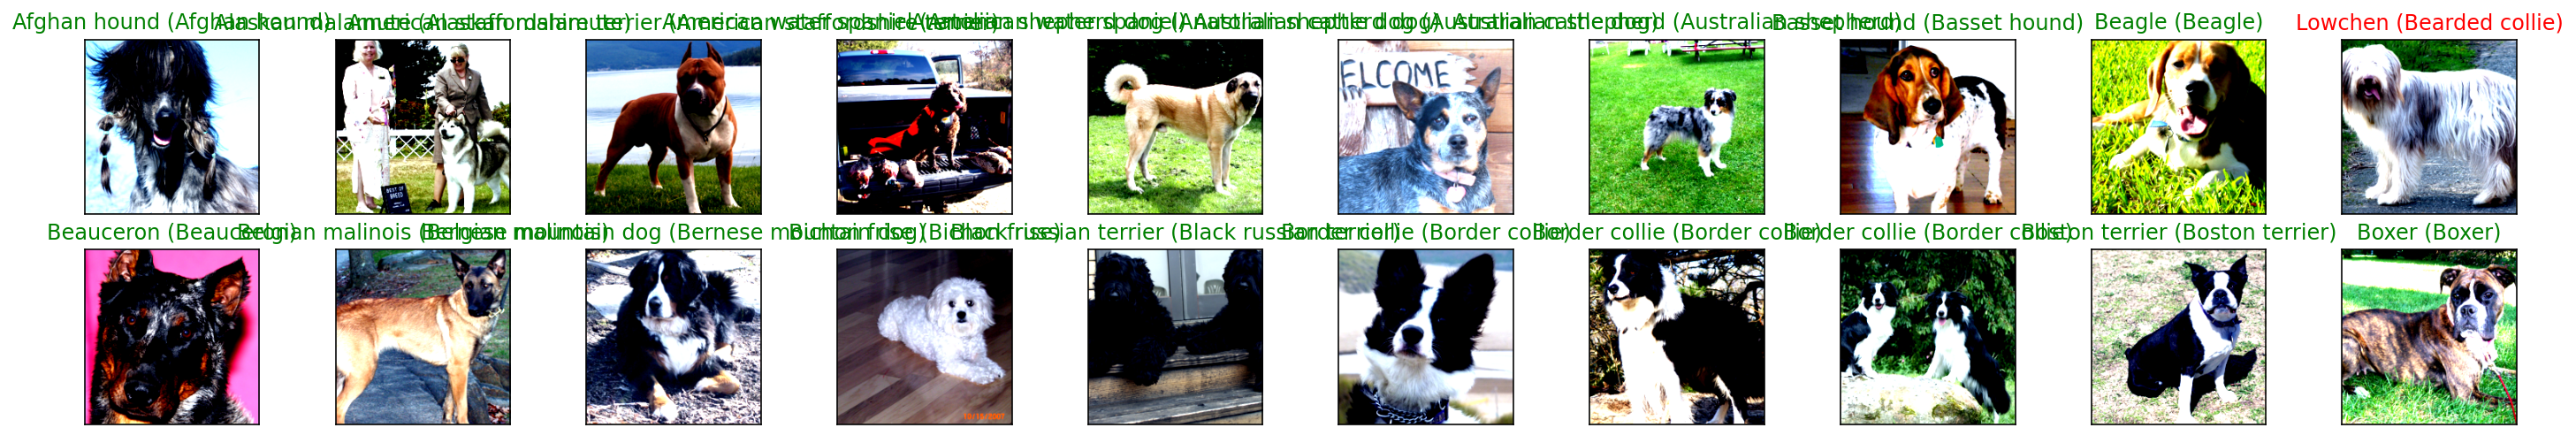

In [33]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model_dens(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not train_on_gpu else images[idx].cpu())
    ax.set_title("{} ({})".format(class_names[preds[idx]], class_names[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [38]:
model_vgg = models.vgg16(pretrained= True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [39]:
model_vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in model_vgg.parameters():
  param.requires_grad =False 

classifier = nn.Sequential(nn.Linear(25088,4096),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           nn.Linear(4096,1000),
                           nn.ReLU(),
                           nn.Dropout (0.5),
                           nn.Linear(1000, n_classes))
model_vgg.classifier = classifier

if train_on_gpu:
  model_vgg.cuda()

model_vgg


In [41]:
criterion_vgg = nn.CrossEntropyLoss()
optimizer_vgg = optim.SGD(model_vgg.parameters(), lr= 0.001)

In [42]:
model_vgg = train(30, loaders_dens, model_vgg, optimizer_vgg, criterion_vgg, train_on_gpu, 'model_vgg.pt')

Epoch: 1 	Training Loss: 4.825032 	Validation Loss: 4.848017
Validation loss decreased (inf --> 4.848017).  Saving model ...
Epoch: 2 	Training Loss: 4.626609 	Validation Loss: 4.855642
Epoch: 3 	Training Loss: 4.393476 	Validation Loss: 4.880135
Epoch: 4 	Training Loss: 4.162534 	Validation Loss: 4.927767
Epoch: 5 	Training Loss: 3.901739 	Validation Loss: 4.938603
Epoch: 6 	Training Loss: 3.654933 	Validation Loss: 5.003347
Epoch: 7 	Training Loss: 3.432783 	Validation Loss: 5.044909
Epoch: 8 	Training Loss: 3.190788 	Validation Loss: 5.200566
Epoch: 9 	Training Loss: 3.010451 	Validation Loss: 5.340730
Epoch: 10 	Training Loss: 2.791385 	Validation Loss: 5.306195
Validation loss decreased (5.340730 --> 5.306195).  Saving model ...
Epoch: 11 	Training Loss: 2.619732 	Validation Loss: 5.505618
Epoch: 12 	Training Loss: 2.453311 	Validation Loss: 5.613162
Epoch: 13 	Training Loss: 2.264729 	Validation Loss: 5.450625
Validation loss decreased (5.613162 --> 5.450625).  Saving model ...
E

In [43]:
model_vgg.load_state_dict(torch.load('model_vgg.pt'))

<All keys matched successfully>

In [44]:
test(loaders_dens, model_vgg, criterion_vgg, train_on_gpu)

test loss: 0.587928/n

 Accuracy: 92% (1947/2101)
